# Testing node2vec on Directed Graphs

In [ ]:
# default_exp embeddings
from nbdev.showdoc import *
import numpy as np
import torch
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [ ]:
from node2vec import node2vec

# Load the Dataset
The test of whether node2vec can incorporate directional information resides in the directed stochastic block model. With the right parameter values (a uniform $\alpha_{ij}$), it's impossible to distinguish the clusters *without* employing directional information.

node2vec does appear to work on directed adjacency matrices, but the embeddings produced by node2vec suffer from the trevails of enforced symmetry. The embedding of $i$ has the same relation to $j$, as $j$ to $i$. Does this hinder node2vec from learning a reasonable embedding of directed data?

We'll start by loading the directed SBM:

The adjacency is currently symmetric  False


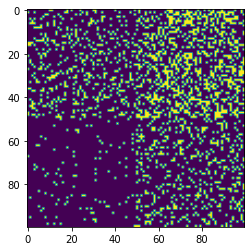

In [ ]:
from directed_graphs.datasets import DirectedStochasticBlockModel
aij = np.array([[0.4,0.4],[0.4,0.4]])
bij = np.array([[0.5,0.9],[0.1,0.5]])
dataset = DirectedStochasticBlockModel(num_nodes=100, num_clusters=2, aij = aij, bij = bij)
data = dataset[0] # there is only graph in this dataset
sparse_A = torch.sparse_coo_tensor(data.edge_index,torch.ones(data.edge_index.shape[1]))
A = sparse_A.to_dense()
plt.imshow(A)

The dataset must be converted to networkx format for node2vec.

In [ ]:
import networkx as nx
from torch_geometric.utils import to_networkx
G_nx = to_networkx(data, to_undirected=False)

In [ ]:
import node2vec

In [ ]:
from node2vec import Node2Vec

In [ ]:

node2vec = Node2Vec(G_nx, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs
# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)

# Look for most similar nodes
model.wv.most_similar('2')  # Output node names are always strings

Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 3): 100%|██████████| 50/50 [00:00<00:00, 132.78it/s]


[('43', 0.4344464838504791),
 ('22', 0.36464184522628784),
 ('59', 0.35225585103034973),
 ('40', 0.33500799536705017),
 ('50', 0.33201801776885986),
 ('28', 0.32850489020347595),
 ('7', 0.3272634744644165),
 ('21', 0.3269588053226471),
 ('82', 0.32263097167015076),
 ('11', 0.31694546341896057)]

The node2vec library used here (available via pip install) returns a fit instance of word2vec. To extract the embeddings, we have to pretend each node is a word 'i'.

In [ ]:
wordlist = [str(i) for i in range(100)]
wordlist

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99']

In [ ]:
word2vec_embeddings = model.wv[wordlist]

In [ ]:
word2vec_embeddings

array([[ 0.22911681, -0.40036196,  0.381982  , ..., -0.04542285,
         0.24083324, -0.10629483],
       [ 0.02185674,  0.11833201,  0.08513736, ..., -0.07961279,
        -0.00144804, -0.30444005],
       [ 0.04951594,  0.06089094,  0.27649584, ...,  0.07537472,
         0.0776489 ,  0.2765063 ],
       ...,
       [ 0.09949533, -0.12775989,  0.11313646, ..., -0.29623228,
        -0.0402816 ,  0.05099463],
       [ 0.16007026, -0.04602139,  0.10442962, ...,  0.22715378,
        -0.00779727,  0.11438596],
       [ 0.2559838 ,  0.01985556,  0.21817516, ..., -0.02941052,
         0.04539142,  0.0597509 ]], dtype=float32)

In [ ]:
word2vec_embeddings.shape

(100, 64)

Visualize the embedding with PHATE

In [ ]:
import phate
phate_op = phate.PHATE()
data_phate = phate_op.fit_transform(word2vec_embeddings)

Calculating PHATE...
  Running PHATE on 100 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculating optimal t...
    Automatically selected t = 8
  Calculated optimal t in 0.01 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.02 seconds.
  Calculating metric MDS...
Calculated PHATE in 0.05 seconds.


In [ ]:
clusters = np.repeat([0,1],50)

/var/folders/y5/4qfj8yjj1hb97n6q01_dg0km0000gn/T/ipykernel_27365/4260628001.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) scatter. (Use scprep.plot.scatter instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter(data_phate[:,0],data_phate[:,1],c=clusters)
/Users/adjourner/miniforge3/envs/pyg_from_source/lib/python3.9/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:xlabel='PHATE1', ylabel='PHATE2'>

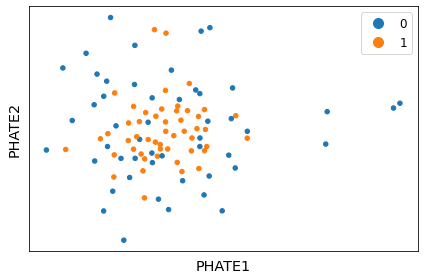

In [ ]:
phate.plot.scatter(data_phate[:,0],data_phate[:,1],c=clusters)

We'll double check this result with PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(word2vec_embeddings)

In [ ]:
pcs

array([[ 2.78458893e-01, -5.28400168e-02],
       [ 6.89272061e-02, -8.21213946e-02],
       [ 3.85841697e-01,  3.87350887e-01],
       [ 4.09958279e-03,  3.18508714e-01],
       [-8.88929740e-02, -2.52134651e-02],
       [-1.50620297e-01,  1.40674427e-01],
       [ 6.64223954e-02,  1.40169367e-01],
       [ 3.18096399e-01,  1.57302037e-01],
       [-1.97398975e-01, -2.72212736e-02],
       [ 1.51198730e-01,  2.85958230e-01],
       [ 5.49611211e-01, -2.86780000e-01],
       [ 6.08466744e-01, -2.91765541e-01],
       [-1.28156483e-01,  2.98627257e-01],
       [ 1.78715140e-01,  5.88170849e-02],
       [ 2.78602928e-01,  1.74793512e-01],
       [ 1.32862598e-01,  1.86956510e-01],
       [ 9.02648941e-02, -1.72494166e-02],
       [ 4.12782989e-02,  2.69729465e-01],
       [ 1.79109558e-01, -4.34058905e-02],
       [ 1.19315140e-01,  3.50045562e-01],
       [ 5.24023294e-01,  2.20819283e-03],
       [ 4.23727669e-02, -1.17845088e-01],
       [ 1.95502773e-01,  2.17230748e-02],
       [ 1.

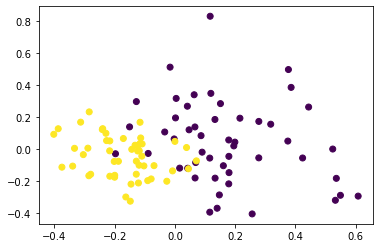

In [ ]:
plt.scatter(pcs[:,0],pcs[:,1],c=clusters)

# Does this work if it's undirected?

In [ ]:
import networkx as nx
from torch_geometric.utils import to_networkx
G_nx = to_networkx(data, to_undirected=True)

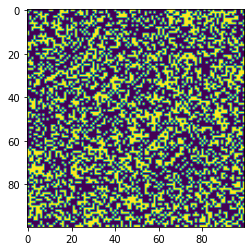

In [ ]:
A_s = 1/2*(A + A.T)
plt.imshow(A_s)

In [ ]:
from node2vec import Node2Vec
node2vec2 = Node2Vec(G_nx, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs
# Embed nodes
model2 = node2vec2.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)

# Look for most similar nodes
model2.wv.most_similar('2')  # Output node names are always strings

Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 3): 100%|██████████| 50/50 [00:00<00:00, 100.06it/s]


[('47', 0.40668103098869324),
 ('86', 0.38291946053504944),
 ('9', 0.36655959486961365),
 ('54', 0.34446197748184204),
 ('82', 0.34055182337760925),
 ('72', 0.339681476354599),
 ('8', 0.33940231800079346),
 ('76', 0.33337703347206116),
 ('14', 0.33221882581710815),
 ('17', 0.3303796648979187)]

In [ ]:
word2vec_embeddings2 = model2.wv[wordlist]

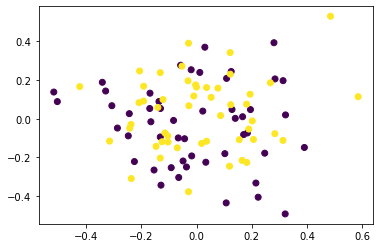

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(word2vec_embeddings2)
plt.scatter(pcs[:,0],pcs[:,1],c=clusters)

# Bipartite Graph

The adjacency is currently symmetric  False


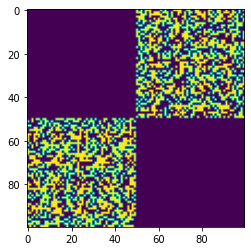

In [ ]:
from directed_graphs.datasets import DirectedStochasticBlockModel
aij = np.array([[0.0,1],[1,0]])
bij = np.array([[0.5,0.5],[0.5,0.5]])
dataset = DirectedStochasticBlockModel(num_nodes=100, num_clusters=2, aij = aij, bij = bij)
data = dataset[0] # there is only graph in this dataset
sparse_A = torch.sparse_coo_tensor(data.edge_index,torch.ones(data.edge_index.shape[1]))
A = sparse_A.to_dense()
plt.imshow(A)

In [ ]:
G_nx = to_networkx(data, to_undirected=False)

In [ ]:
from node2vec import Node2Vec
node2vec2 = Node2Vec(G_nx, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs
# Embed nodes
model2 = node2vec2.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)

# Look for most similar nodes
model2.wv.most_similar('2')  # Output node names are always strings

Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 50/50 [00:00<00:00, 102.69it/s]


[('9', 0.7889758348464966),
 ('31', 0.7778904438018799),
 ('3', 0.7463476657867432),
 ('34', 0.7347561717033386),
 ('10', 0.7319777011871338),
 ('32', 0.7303144931793213),
 ('36', 0.7290616631507874),
 ('14', 0.7284523248672485),
 ('1', 0.7151605486869812),
 ('26', 0.7109202742576599)]

In [ ]:
word2vec_embeddings2 = model2.wv[wordlist]

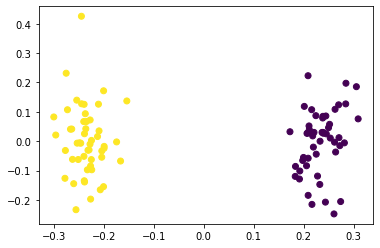

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(word2vec_embeddings2)
plt.scatter(pcs[:,0],pcs[:,1],c=clusters)

Let's formalize the steps of running node2vec on a graph and obtaining a PCA plot.

In [ ]:
# export
from node2vec import Node2Vec
from sklearn.decomposition import PCA

def node2vec_and_plot(data,n_clusters,title=""):
  G_nx = to_networkx(data, to_undirected=False)
  n_points = data.x.shape[1]
  node2vec2 = Node2Vec(G_nx, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs
  # Embed nodes
  model = node2vec2.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)
  # Get words
  wordlist = [str(i) for i in range(n_points)]
  clusters = np.repeat(list(range(n_clusters)),n_points/n_clusters)
  # Extract embeddings
  word2vec_embeddings = model.wv[wordlist]
  print("performing PCA...")
  pca = PCA(n_components=2)
  clusters = np.repeat(list(range(n_clusters)),n_points/n_clusters)
  pcs = pca.fit_transform(ems)
  plt.figure()
  scatter = plt.scatter(pcs[:,0],pcs[:,1],c=clusters)
  plt.legend(handles = scatter.legend_elements()[0], title="Blobs", labels=list(range(n_clusters)))
  plt.suptitle(title)
  return word2vec_embeddings
  

# Sinks and Sources

Computing transition probabilities:   0%|          | 0/700 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:04<00:00, 11.83it/s]


performing PCA...


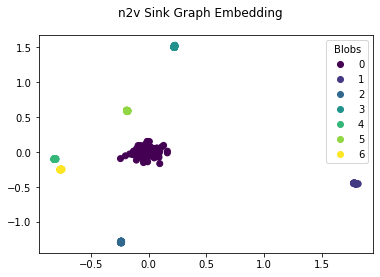

In [ ]:
from directed_graphs.datasets import sink_graph, source_graph
dataset = sink_graph(n_points = 700)
data = dataset[0]
ems = node2vec_and_plot(data,7,title="n2v Sink Graph Embedding")

Computing transition probabilities:   0%|          | 0/700 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:04<00:00, 11.32it/s]


performing PCA...


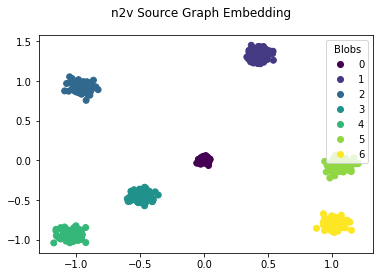

In [ ]:
dataset = source_graph(n_points = 700)
data = dataset[0]
ems = node2vec_and_plot(data,7, title="n2v Source Graph Embedding")

# Node2Vec on Simple Random Graphs

In [ ]:
from directed_graphs.datasets import SmallRandom, visualize_graph, SourceSink
pre_transform = SourceSink(prob_source=0.6, prob_sink=0.4, adv_prob=0.1, remove_prob=0)
dataset = SmallRandom(num_nodes=20, prob_edge=0.2)
data = dataset[0] # there is only graph in this dataset

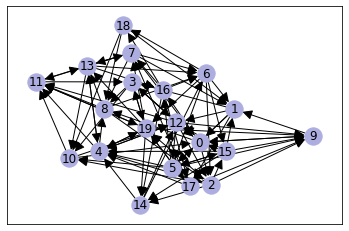

In [ ]:
visualize_graph(data)

Computing transition probabilities:   0%|          | 0/20 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 1038.87it/s]


performing PCA...


/Users/adjourner/miniforge3/envs/pyg_from_source/lib/python3.9/site-packages/matplotlib/collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


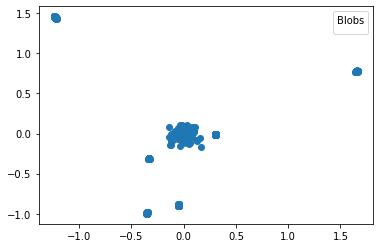

In [ ]:
G_nx = to_networkx(data, to_undirected=False)
n_points = data.x.shape[1]
node2vec2 = Node2Vec(G_nx, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs
# Embed nodes
model = node2vec2.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)
# Get words
wordlist = [str(i) for i in range(n_points)]
# Extract embeddings
word2vec_embeddings = model.wv[wordlist]
print("performing PCA...")
pca = PCA(n_components=2)
pcs = pca.fit_transform(ems)
plt.figure()
scatter = plt.scatter(pcs[:,0],pcs[:,1])
plt.legend(handles = scatter.legend_elements()[0], title="Blobs")